In [2]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#replace this with the path to your meld hdf file
savepath = "/path/to/folder"
#replace the site code with your specific site code
site_code = "H3"
#open hdf file for reading
f=h5py.File(os.path.join(savepath,site_code+"_patient_featurematrix.hdf5"),'r')


In [16]:
#checking ids included
scanners = f[site_code].keys()
for scanner in scanners:
    if 'control' in f[os.path.join(site_code,scanner)].keys():
        print("controls for scanner "+ scanner)
        controls = f.require_group(os.path.join(site_code, scanner,'control')).keys()
        print(controls)
    elif 'patient' in f[os.path.join(site_code,scanner)].keys():
        print("patient ids for scanner "+ scanner +":")
        patients = f.require_group(os.path.join(site_code, scanner,'patient')).keys()
        print(patients)


patient ids for scanner: 3T:
[u'MELD_H3_3T_FCD_0001', u'MELD_H3_3T_FCD_0002', u'MELD_H3_3T_FCD_0003', u'MELD_H3_3T_FCD_0004', u'MELD_H3_3T_FCD_0005', u'MELD_H3_3T_FCD_0006', u'MELD_H3_3T_FCD_0007', u'MELD_H3_3T_FCD_0008', u'MELD_H3_3T_FCD_0009', u'MELD_H3_3T_FCD_0010', u'MELD_H3_3T_FCD_0011', u'MELD_H3_3T_FCD_0012', u'MELD_H3_3T_FCD_0013', u'MELD_H3_3T_FCD_0014', u'MELD_H3_3T_FCD_0015', u'MELD_H3_3T_FCD_0016', u'MELD_H3_3T_FCD_0017', u'MELD_H3_3T_FCD_0018', u'MELD_H3_3T_FCD_0019', u'MELD_H3_3T_FCD_0020', u'MELD_H3_3T_FCD_0021', u'MELD_H3_3T_FCD_0022', u'MELD_H3_3T_FCD_0023']


In [20]:
#checking file names for the first subject
hemis=['lh','rh']
scanners = f[site_code].keys()
for scanner in scanners:
    group=f[os.path.join(site_code,scanner)].keys()
    if 'control' in f[os.path.join(site_code,scanner)].keys():
        ids = f.require_group(os.path.join(site_code, group[0])).keys()
        for hemi in hemis:
            files = f.require_group(os.path.join(site_code, scanner,group[0], ids[0],hemi)).keys()
            print('files for the hemisphere ' + hemi)
            print(files)
    elif 'patient' in f[os.path.join(site_code,scanner)].keys():
        print("patient ids for scanner "+ scanner +":")
        ids = f.require_group(os.path.join(site_code, scanner,group[0])).keys()
        for hemi in hemis:
            files = f.require_group(os.path.join(site_code, scanner,group[0], ids[0],hemi)).keys()
            print('files for subject '+patients[0]+ ', hemisphere ' + hemi)
            print(files)
            if '.on_lh.lesion.mgh' in files:
                print("this patient's lesion mask was found on hemisphere:"+ hemi)

patient ids for scanner 3T:
files for subject MELD_H3_3T_FCD_0001, hemisphere lh
[u'.inter_z.asym.on_lh.curv.mgh', u'.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.25.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.5.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.75.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.pial.K_filtered.sm20.mgh', u'.inter_z.asym.on_lh.intra_z.thickness.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.w-g.pct.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.wm_FLAIR_0.5.sm10.mgh', u'.inter_z.asym.on_lh.intra_z.wm_FLAIR_1.sm10.mgh', u'.inter_z.asym.on_lh.sulc.mgh', u'.inter_z.on_lh.curv.mgh', u'.inter_z.on_lh.intra_z.gm_FLAIR_0.25.sm10.mgh', u'.inter_z.on_lh.intra_z.gm_FLAIR_0.5.sm10.mgh', u'.inter_z.on_lh.intra_z.gm_FLAIR_0.75.sm10.mgh', u'.inter_z.on_lh.intra_z.gm_FLAIR_0.sm10.mgh', u'.inter_z.on_lh.intra_z.pial.K_filtered.sm20.mgh', u'.inter_z.on_lh.intra_z.thickness.sm10.mgh', u'.inter_z.on_lh.intra_z.w-g.pct.sm10.mgh', u'.inte

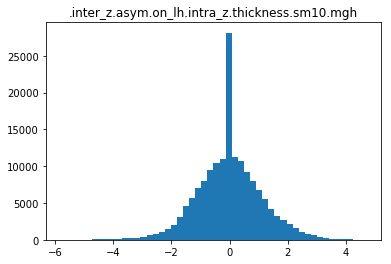

In [34]:
#checking individual data files for a subject
feature= '.inter_z.asym.on_lh.intra_z.thickness.sm10.mgh'

values=f[os.path.join(site_code, scanner,group[0], ids[0],hemi,feature)][:]
_= plt.hist(values, bins=50)
_=plt.title(feature)

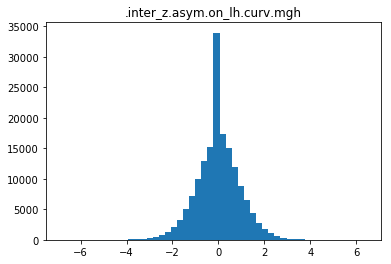

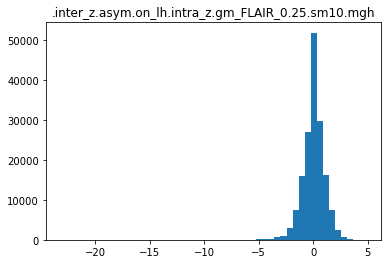

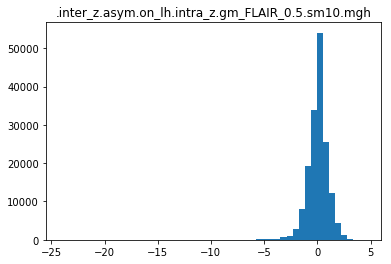

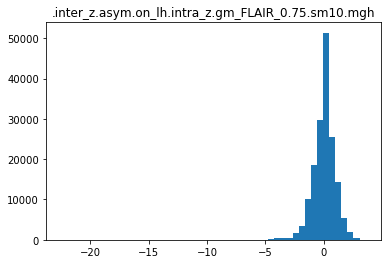

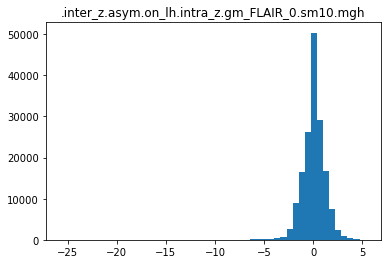

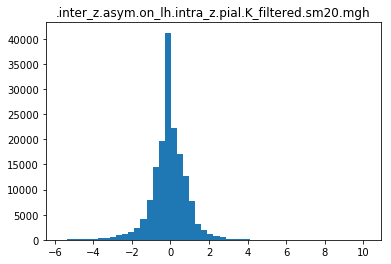

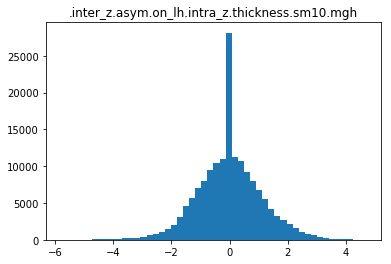

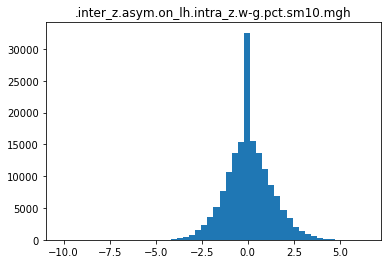

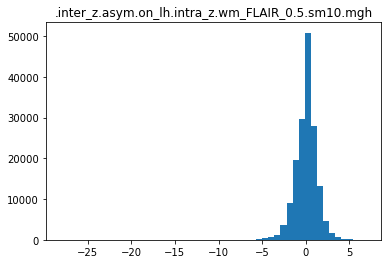

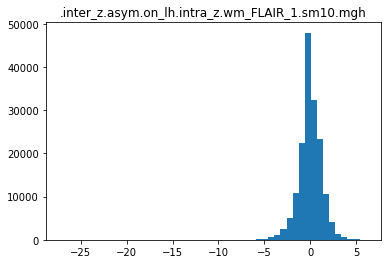

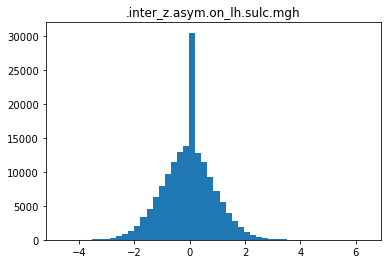

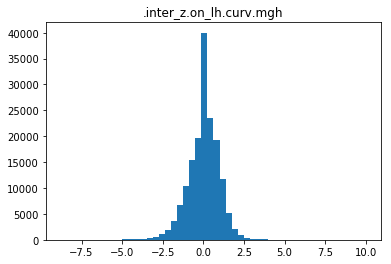

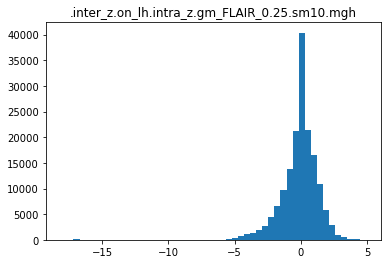

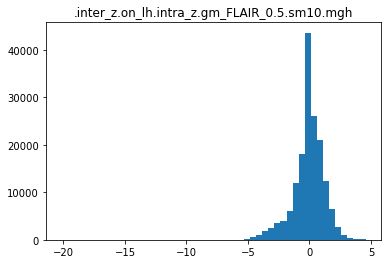

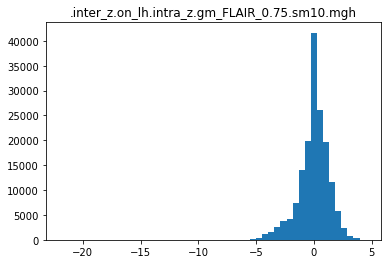

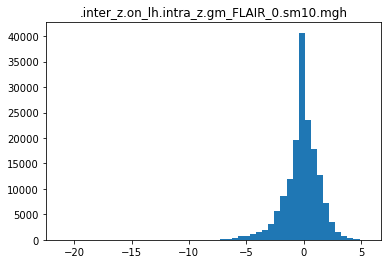

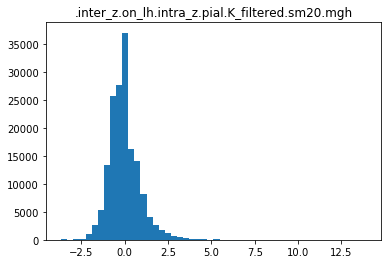

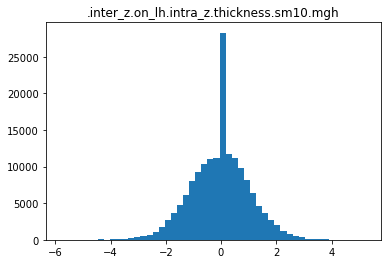

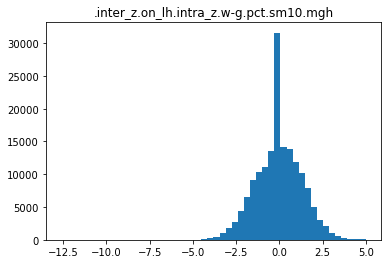

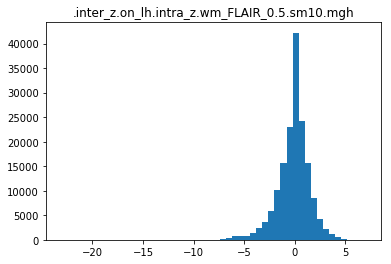

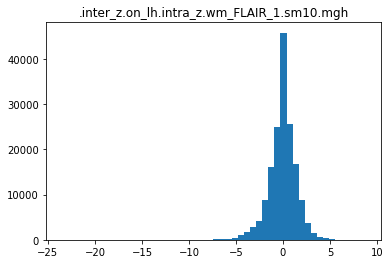

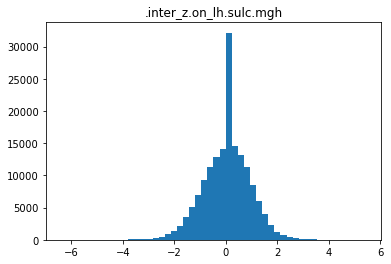

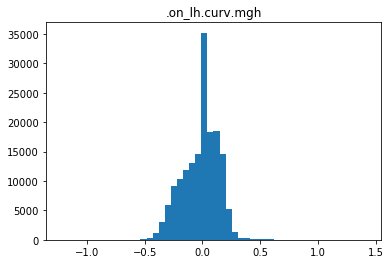

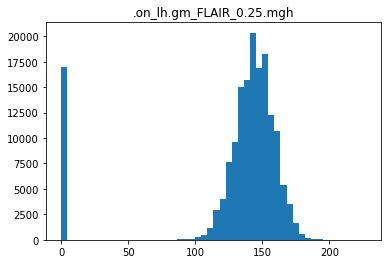

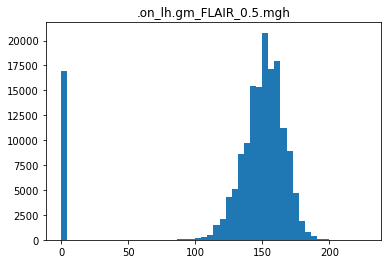

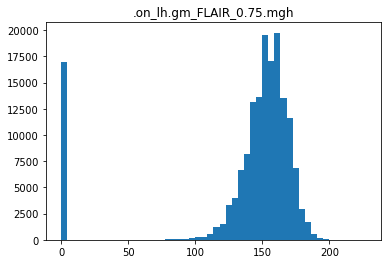

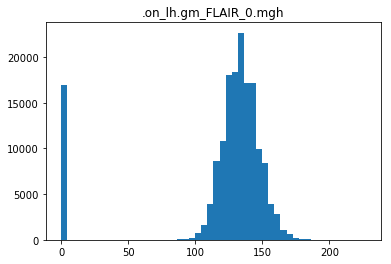

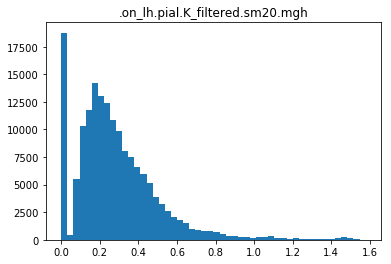

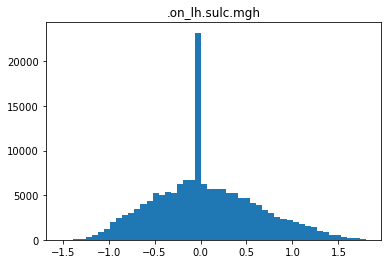

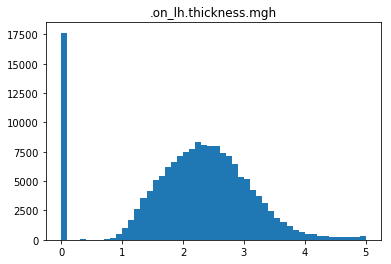

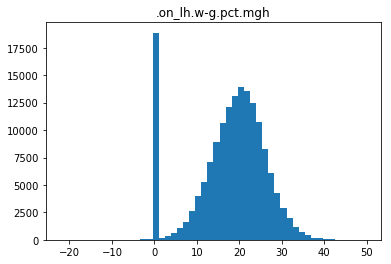

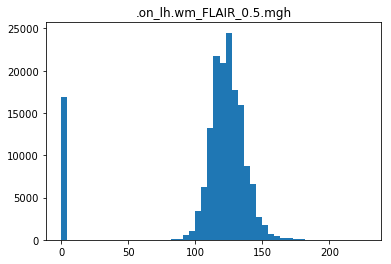

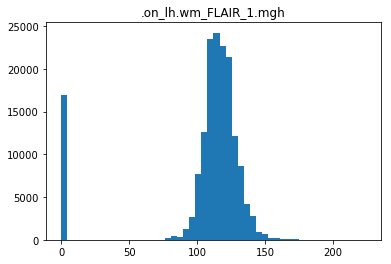

In [35]:
#check all the data files for a subject
#large peaks at zero are due to medial wall values that are fixed at zero
for feature in files:
    plt.figure()
    values=f[os.path.join(site_code, scanner,group[0], ids[0],hemi,feature)][:]
    _= plt.hist(values, bins=50)
    _=plt.title(feature)